# Homework 14 - Fourier transforms Daniel Teeuwsen

#### Excercise 1

Sample this even signal at whatever sampling rate you wish, and make a plot of it;
$$
h(t) = 3\cos(2\pi ft)+2\cos(6\pi ft)+\cos(10\pi ft)
$$
Decompose the signal into its components; then check that they are essentially real and in the ratio 3:2:1 (or 9:4:1 for the power spectrum), that the frequencies have the expected values (not just ratios), and that the components resum to give the input signal.

Experiment on the separate effects of picking different values of the step size $\Delta$ and of enlarging the measurement period $T = N\Delta$.

In [168]:
import numpy             as np
import scipy.fft
%matplotlib inline
import matplotlib.pyplot as plt

Sample rate: 409.6
Step size: 0.00244140625


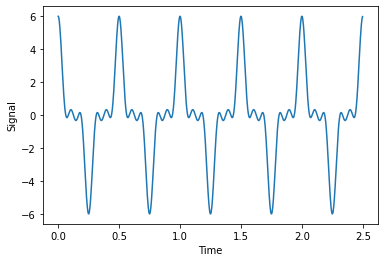

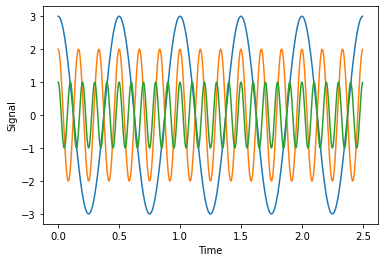

In [169]:
N = 2**10
f = 2        

t_min = 0.0  
num_cycles = 5
t_max = num_cycles/f

t, delta_t = np.linspace(t_min,t_max,N,retstep=True,endpoint=False)  
sample_rate = 1/delta_t

h1 = 3.*np.cos(2*np.pi*f*t)
h2 = 2.*np.cos(6*np.pi*f*t)
h3 = 1.*np.cos(10*np.pi*f*t)

h = h1 + h2 + h3

print('Sample rate: '+str(sample_rate))
print('Step size: '+str(delta_t))

plt.plot(t,h)
plt.xlabel('Time')
plt.ylabel('Signal')
plt.show()
plt.close()

plt.plot(t,h1)
plt.plot(t,h2)
plt.plot(t,h3)
plt.xlabel('Time')
plt.ylabel('Signal')
plt.show()
plt.close()


<font color="blue"> **Answer:** </font> The smaller the step size, the higher the sample rate, and the smoother the curve. When step size is relatively large the curve becomes jagged and pointy. This makes sense because it is a less accurate approximation with fewer data points.

Enlarging the measurement period either decreases the frequency or increases the number of cycles or both.

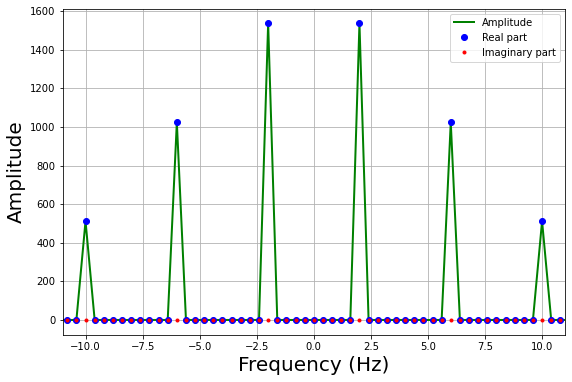

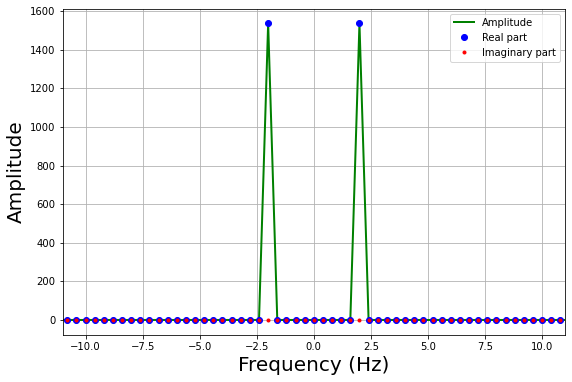

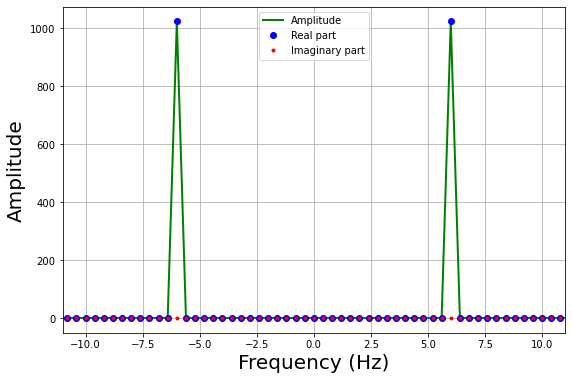

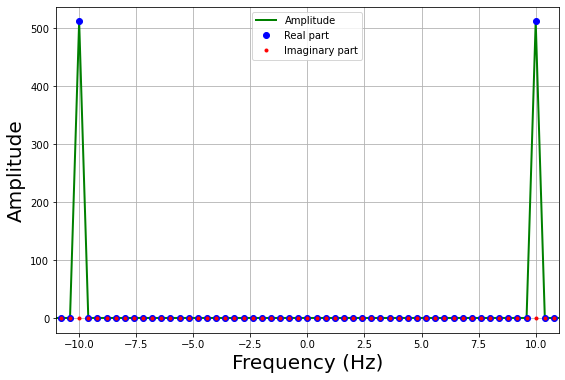

In [171]:
h_array = ([h,h1,h2,h3])
H_array = ([H,H1,H2,H3])
f_array = ([f,f1,f2,f3])



for i in range(4):
    H_array[i] = scipy.fft.fft(h_array[i])
    f_array[i] = scipy.fft.fftfreq(H_array[i].size,delta_t)
    H_array[i] = scipy.fft.fftshift(H_array[i])
    f_array[i] = scipy.fft.fftshift(f_array[i])
    
    plt.figure(figsize=(9,6))
    plt.plot(f_array[i],np.abs(H_array[i]), "g-", linewidth=2, label="Amplitude")
    plt.plot(f_array[i],np.real(H_array[i]),"bo", linewidth=2, label="Real part")
    plt.plot(f_array[i],np.imag(H_array[i]),"r.", linewidth=2, label="Imaginary part")
    plt.xlim(-2.2*signal_freq,2.2*signal_freq)
    plt.legend()
    plt.ylabel("Amplitude", fontsize=20)
    plt.xlabel("Frequency (Hz)", fontsize=20)
    plt.grid()
    plt.show()
    plt.close()



<font color="blue"> **Answer:** </font> 
It is clear from the graphs that the imaginary part is 0 (ie. the components are real), that the amplitudes peak at approximately 1500, 1000, and 500 (ie. ratio 3:2:1), and that the first graph is the sum of the subsequent three (ie. sum of components gives input signal). Finally, it can be seen that the frequencies have the values +/- 2, 6, and 10 which is to be expected since 2, 6, and 10 are the coefficients in the arguments of the cosine functions.


#### Excercise 2

Take the FFT of the half wave function, defined as 
$$
h(t) = \left\{\begin{array}{@{}} 
\sin{2 \pi ft},\textrm{ for }0\leq t \leq\frac{T}{2}  \\
0,\textrm{ for }\frac{T}{2}\leq t\leq T
\end{array}\right.
$$
This function is periodic, nonharmonic (with only the upper half of a sine wave), and continuous, but with discontinuous derivatives. Because it lacks the sharp corners of the sawtooth function, it is easier to reproduce with a finite Fourier series.
$$
h(t) = \frac{a_0}{2}+\sum_{n=1}^{\infty}a_n\cos{2\pi f_0nt}+b_n\sin{2\pi f_0nt}
$$
where 
$$
a_n = \left\{
\begin{array}{c} 
\frac{-2}{\pi(n^2-1)},\textrm{ $n$ even or 0}  \\
0,\textrm{ $n$ odd}
\end{array}\right.
$$
$$
b_n = \left\{\begin{array}{c} 
\frac{1}{2},\ n=1  \\
0, n\neq1
\end{array}\right.
$$
Verify that you get the correct harmonics, and they appear with nearly to correct amplitude, or intensity for the power spectrum.

<div class="alert alert-block alert-info">
<b>Note:</b> Even if you use the method of generating exact cycles, 
</div>

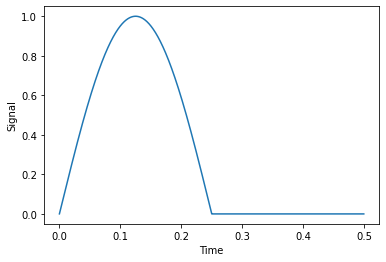

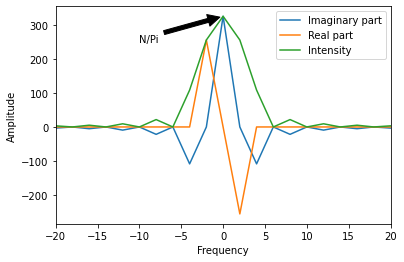

In [175]:
N = 2**10
f = 2        

t_min = 0.0  
num_cycles = 1
t_max = num_cycles/f

t, delta_t = np.linspace(t_min,t_max,N,retstep=True,endpoint=False)  
sample_rate = 1/delta_t
signal_period = 1/f

def h(t,f):
    h_arr = np.zeros(t.size)
    for i in range(t.size//2-1):
        h_arr[i]=np.sin(2*np.pi*f*t[i])
    return h_arr

def h_series(t,f): 
    result = 1/np.pi + 0.5*np.sin(2*np.pi*f*t) # a0/2 + only sin term
    for n in range(1,N):
        if n%2 ==0 :
            result = result + (-2)/(np.pi*n**2-np.pi)*np.cos(2*np.pi*f*n*t)
    return result
 
#plt.plot(t,h(t,f))                       # Can use either h or h_series definition of function
plt.plot(t,h_series(t,f))                 # Keep one line and comment out the other
plt.xlabel('Time')
plt.ylabel('Signal')
plt.show()
plt.close()

#H = scipy.fft.fft(h(t,f))                # Can use either h or h_series definition of function
H = scipy.fft.fft(h_series(t,f))          # Keep one line and comment out the other
F = scipy.fft.fftfreq(H.size,delta_t)
H = scipy.fft.fftshift(H)
F = scipy.fft.fftshift(F)

plt.plot(F,np.real(H), label='Imaginary part')
plt.plot(F,np.imag(H), label='Real part')
plt.plot(F,np.abs(H),  label='Intensity')
plt.legend()
plt.annotate('N/Pi', xy=(0,1024/np.pi), xytext=(-10, 250),arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlim([-20,20])
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()
plt.close()


<font color="blue">**Answer**</font>  It makes sense that the real part has a peak and trough at negative and positive 2 respectively because the frequency f=2. Then there is an imaginary part peak and intensity peak at 0 which is due to the fact that the original sine function is 0 for half of its domain. The corresponding amplitude is correct as it is at 1024/Pi.

#### Excercise 3

Take the DFT of the non-periodic, normalized Gaussian function with a mean of 10, and variance of 0.4. Since the FFT assumes all functions are periodic, you will have to make sure there is lots of zero space around the Gaussian, so $t$ should run from zero to perhaps 20. In two plots, show both the Gaussian and $|H(f)|$.

What happens to the maximum nonzero frequency as you change the variance of the Gaussian function?

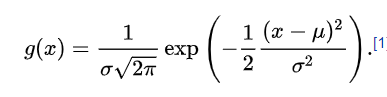

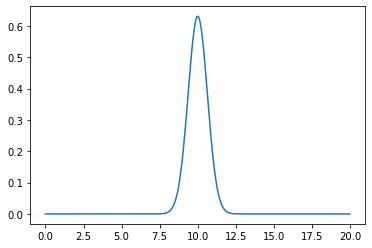

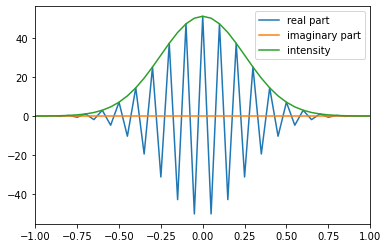

Amplitude of the maximum nonzero frequency : (51.20 + -0.00i)


In [207]:
mu    = 10
sigma = np.sqrt(10)/5 # sigma^2 = variance =0.4 => sigma = sqrt(0.4) = sqrt(10)/5

def g(t, *args):
    mu, sigma = args
    return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-((t-mu)**2)/(2*sigma**2))

N = 2**10
f = 0.25        

t_min = 0.0  
num_cycles = 5
t_max = num_cycles/f

t, delta_t = np.linspace(t_min,t_max,N,retstep=True,endpoint=False)
plt.plot(t,g(t,mu,sigma))
plt.show()
plt.close()

H = scipy.fft.fft(g(t,mu,sigma))
H = scipy.fft.fftshift(H)
F = scipy.fft.fftfreq(H.size,delta_t)
F = scipy.fft.fftshift(F)

plt.plot(F,np.real(H),label='real part')
plt.plot(F,np.imag(H),label='imaginary part')
plt.plot(F,np.abs(H),label='intensity')
plt.legend()
plt.xlim(-1,1)
plt.show()
plt.close()

print(f"Amplitude of the maximum nonzero frequency : ({H[N//2].real:.2f} + {H[N//2].imag:.2f}i)")

<font color="blue"> **Answer:** </font> the max nonzero frequency does not change regardless of what the variance is.


#### Excercise 4

Calculate **your own spectrogram** of the any of the recorded sounds and plot the 2D result using a log scale. You must use `scipy.fft.fft`.  This will take some time to compute, so test with larger window shifts first.

Set the window length to be $w=2048$, and the window shift between the FFT to be $\delta=2048/16$. The number of spectrum you will need to calculate will be $n=(N-w)/\delta$, where $N$ is the number of time data points that were sampled at the sampling rate of 44100 Hz, or whatever the recorded rate was. Your 2D spectrogram will be of size $(n,w)$.

It will not look as good as the example from the lecture notebook because we are not filtering the data. But you should still see the sounds and overtones as in the example.

13.3515625
3757
2048


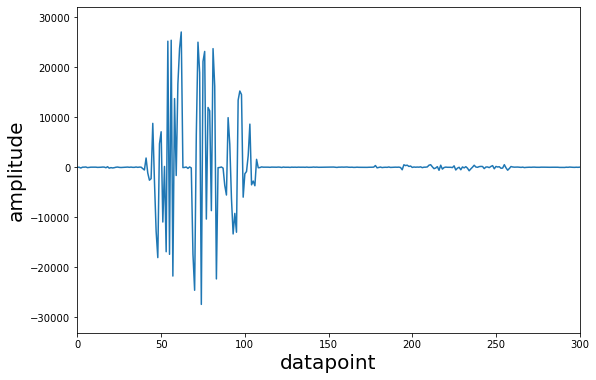

In [257]:
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import scipy.signal

data=np.fromfile("sparrow.dat",dtype=np.int16)
my_data = data[::1500]

w = 2048
delta = 2048/16
N = my_data.size     
n = (N-w)/delta

plt.figure(figsize=(9,6))
plt.plot(my_data)
plt.ylabel("amplitude", fontsize=20)
plt.xlabel("datapoint", fontsize=20)
plt.xlim(0,300)
plt.show()
plt.close()

1025
2934
3007350
3007350


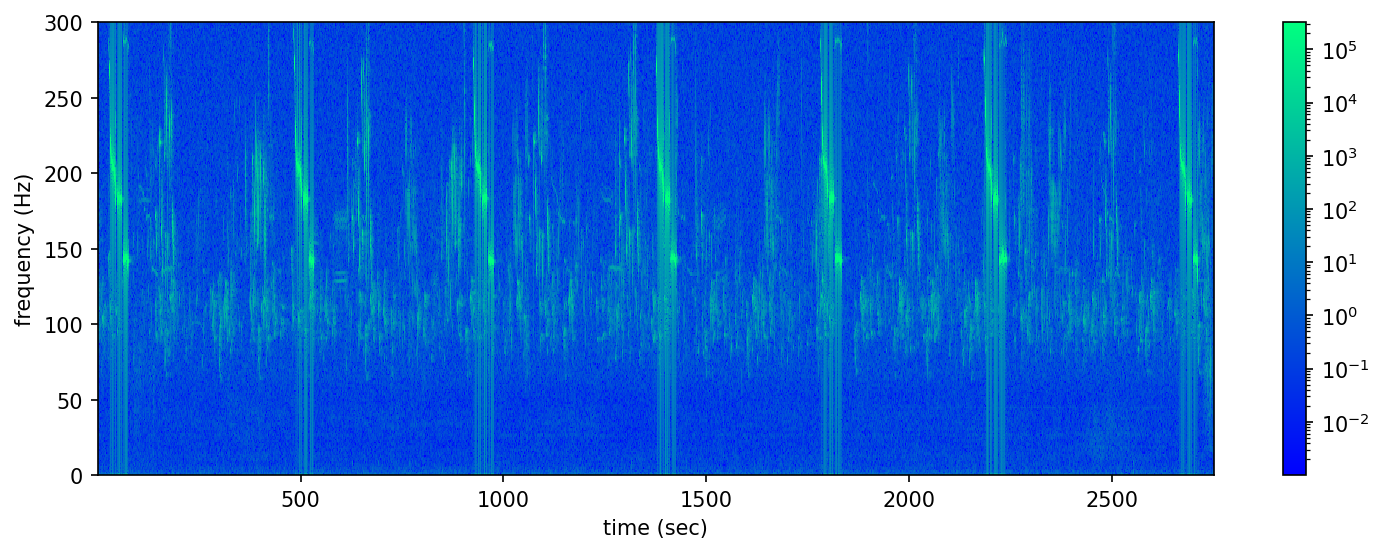

In [258]:
f, t, Sxx = scipy.signal.spectrogram(data,window=('hamming'),fs=sample_rate, nperseg=2048, noverlap = 2048//16)

print(f.size)
print(t.size)
print(Sxx.size)
print(f.size*t.size)

cmap1 = plt.get_cmap('winter')
norm1 = colors.LogNorm(Sxx.min()+0.001, Sxx.max()/1000.,clip=True)
plt.figure(num=None,figsize=(12,4), dpi=150, facecolor='w', edgecolor='k')
plt.pcolormesh(t,f,Sxx,cmap=cmap1,norm=norm1,shading='auto')
plt.ylim(0,300)
plt.colorbar()
plt.xlabel("time (sec)")
plt.ylabel("frequency (Hz)")
plt.show()
plt.close()